In [7]:
import os
import sys
import time
import glob
import numpy as np
import pandas as pd
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import linear_model
from sklearn.cluster import KMeans
from numpy import genfromtxt
from ph_scan import *

In [2]:
np.random.seed(314)

In [3]:
def kmeans(fname, n, p):
    # -- initialize seed
    scan = PhScan(fname)
    img = scan.img.transpose(1, 2, 0)
    # -- put this into a shape for clustering
    nrow = img.shape[0]
    ncol = img.shape[1]
    nwav = img.shape[2]
    npix = nrow * ncol
    data = np.zeros((nrow, ncol, nwav * 25), dtype=img.dtype)
    for ii in range(2, nrow - 2):
        for jj in range(2, ncol - 2):
            data[ii, jj] = img[ii - 2: ii + 3, jj - 2: jj + 3] \
               .transpose(2, 0, 1).flatten()

    data = data.transpose(2, 0, 1).reshape(data.shape[2], npix).T
    # -- cluster a p% subset
#     km = KMeans(n_clusters=n)
    km = KMeans(n_clusters=n, n_jobs=10)
    
    norm = data - data.mean(1, keepdims=True)
    norm /= norm.std(1, keepdims=True) + (norm.std(1, keepdims=True) == 0)
    ind_nz = np.where(norm.any(axis=1))[0]
    ind = np.random.choice(ind_nz, int(p * npix))
    km.fit(norm[ind])
    labs = np.ones((npix), dtype=float) * n
    # -- predict on whole data set
    labs[ind_nz] = km.predict(norm[ind_nz])
    labs_img = labs.reshape(nrow, ncol)
    np.savetxt(fname+".csv", labs_img)

In [4]:
def kmeans_4(fname, n, p):
    # -- initialize seed
    scan = PhScan(fname)
    img = scan.img.transpose(1, 2, 0)
    # -- put this into a shape for clustering
    nrow = img.shape[0]
    ncol = img.shape[1]
    nwav = img.shape[2]
    npix = nrow * ncol
    
    data = img.transpose(2, 0, 1).reshape(nwav, nrow * ncol).T
    # -- cluster a 5% subset
    km = KMeans(n)
    norm = data - data.mean(1, keepdims=True)
    norm /= norm.std(1, keepdims=True) + (norm.std(1, keepdims=True) == 0)

    ind_nz = np.where(norm.any(axis=1))[0]
    ind = np.random.choice(ind_nz, int(p * npix))
    km.fit(norm[ind])
    labs = np.ones((npix), dtype=float) * n
    # -- predict on whole data set
    labs[ind_nz] = km.predict(norm[ind_nz])
    labs_img = labs.reshape(nrow, ncol)
    np.savetxt(fname+"_4.csv", labs_img)

In [5]:
fname = 'Delivery/057773250120_01/057773250120_01_P004_MUL/17SEP29170130-M2AS-057773250120_01_P004.TIF'
kmeans(fname,20,0.01)

reading Delivery/057773250120_01/057773250120_01_P004_MUL/17SEP29170130-M2AS-057773250120_01_P004.TIF...
extracting to array...  (extracted in 0.138787984848s)
rescaling...


<function matplotlib.pyplot.show>

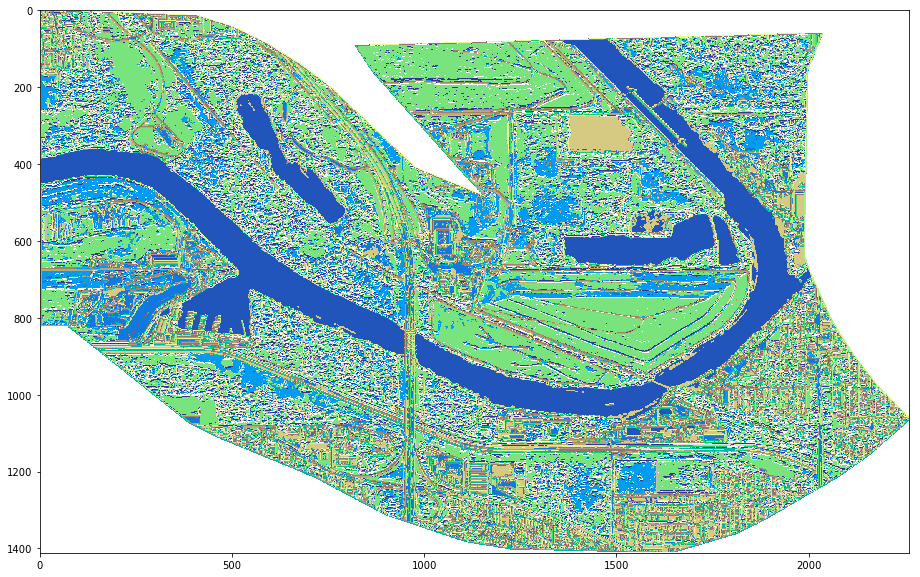

In [8]:
my_data = genfromtxt('Delivery/057773250120_01/057773250120_01_P004_MUL/17SEP29170130-M2AS-057773250120_01_P004.TIF.csv')
my_data[my_data == 20.0] = np.NaN
nrow = my_data.shape[0]
ncol = my_data.shape[1]
xsize = 16.
ysize = xsize * float(nrow) / float(ncol)
    
fn = fname.split(".")[0]
fn = fn.replace('/', '.')
plt.figure(figsize=[xsize, ysize])
plt.imshow(my_data, cmap='terrain')
plt.show